In [1]:
import numpy as np
import modred as mr
import os
import matplotlib
matplotlib.use('TkAgg')  # Specify the backend
import matplotlib.pyplot as plt
from matplotlib import cm

import data_analysis
import importlib
importlib.reload(data_analysis)

<module 'data_analysis' from '/home/julielimonet/Documents/Stage_M2/code/data_analysis.py'>

In [2]:
from data_analysis import import_data

time, x, z, u, w, T, umean, wmean = import_data(f'/home/julielimonet/Documents/Stage_M2/')

In [3]:
print(z[0,43 : 48])

[0.85999993 0.87999992 0.89999992 0.91999992 0.93999991]


In [5]:
print(np.shape(np.mean(u[:,:,43:48], axis = 2)))

uz = np.mean(np.mean(u[:,:,43:48], axis = 2), axis = 1)
print(np.shape(uz))
print(np.shape(time))
print(len(time))

(6249, 81)
(6249,)
(6249,)
6249


In [9]:
uz_mean = np.mean(uz)

In [34]:
from scipy.signal import find_peaks
min_indices = find_peaks(-uz, distance = 50, height = 700)[0]
max_indices = find_peaks(uz, distance = 50, height = -150)[0]

print(len(min_indices))
print(len(max_indices))

24
32


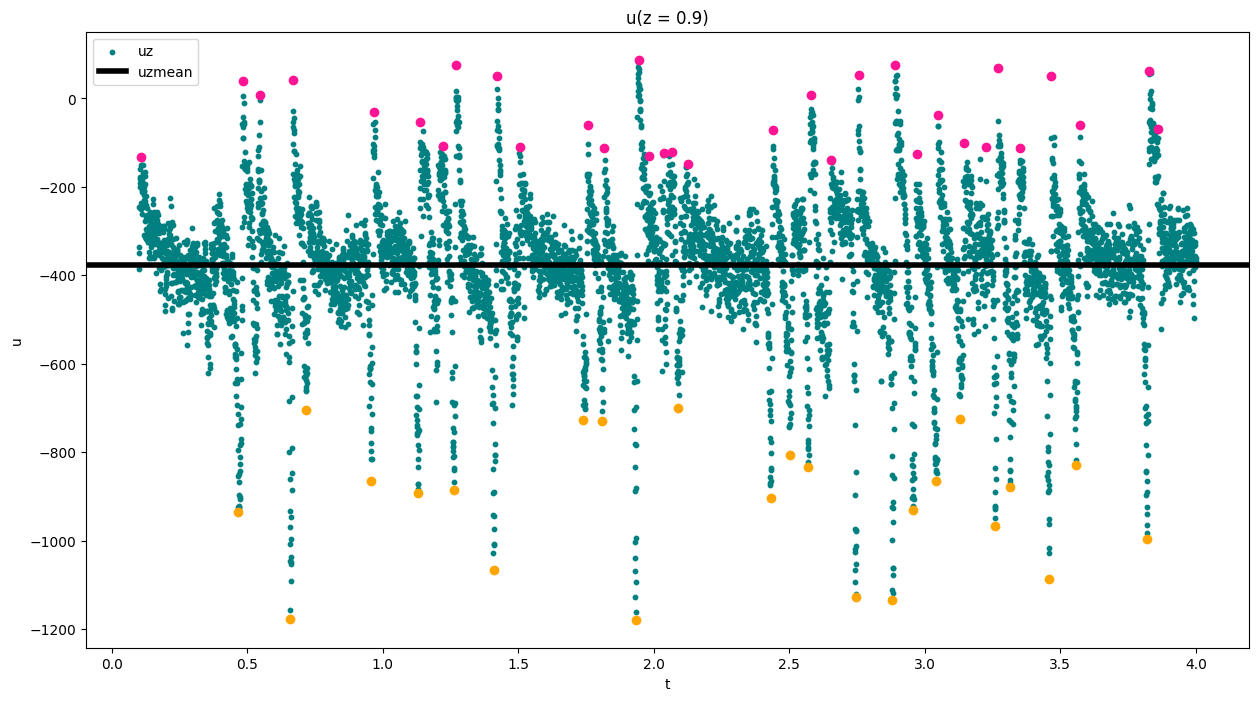

In [41]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (15, 8))
ax.scatter(time, uz, s = 10, c = 'teal', label = 'uz')
ax.scatter([time[i] for i in min_indices], [uz[i] for i in min_indices], color = 'orange')
ax.scatter([time[i] for i in max_indices], [uz[i] for i in max_indices], color = 'deeppink')

ax.axhline(uz_mean, c = 'k', linewidth = 4, label = 'uzmean')
ax.set_title('u(z = 0.9)')
ax.set_ylabel('u')
ax.set_xlabel('t')
ax.legend()
# fig.tight_layout()
plt.show()

In [47]:
print(min_indices)

[ 581  892  991 1369 1647 1859 2091 2615 2730 2924 3188 3728 3844 3954
 4230 4442 4570 4709 4846 5067 5159 5384 5543 5960]


In [96]:
print(x.T[0, :])

[-3.9999999  -3.8999999  -3.7999999  -3.69999991 -3.59999991 -3.49999991
 -3.39999991 -3.29999992 -3.19999992 -3.09999992 -2.99999992 -2.89999993
 -2.79999993 -2.69999993 -2.59999993 -2.49999994 -2.39999994 -2.29999994
 -2.19999994 -2.09999995 -1.99999995 -1.89999995 -1.79999995 -1.69999996
 -1.59999996 -1.49999996 -1.39999996 -1.29999997 -1.19999997 -1.09999997
 -0.99999997 -0.89999998 -0.79999998 -0.69999998 -0.59999998 -0.49999999
 -0.39999999 -0.29999999 -0.2        -0.1         0.          0.1
  0.2         0.29999999  0.39999999  0.49999999  0.59999998  0.69999998
  0.79999998  0.89999998  0.99999997  1.09999997  1.19999997  1.29999997
  1.39999996  1.49999996  1.59999996  1.69999996  1.79999995  1.89999995
  1.99999995  2.09999995  2.19999994  2.29999994  2.39999994  2.49999994
  2.59999993  2.69999993  2.79999993  2.89999993  2.99999992  3.09999992
  3.19999992  3.29999992  3.39999991  3.49999991  3.59999991  3.69999991
  3.7999999   3.8999999   3.9999999 ]


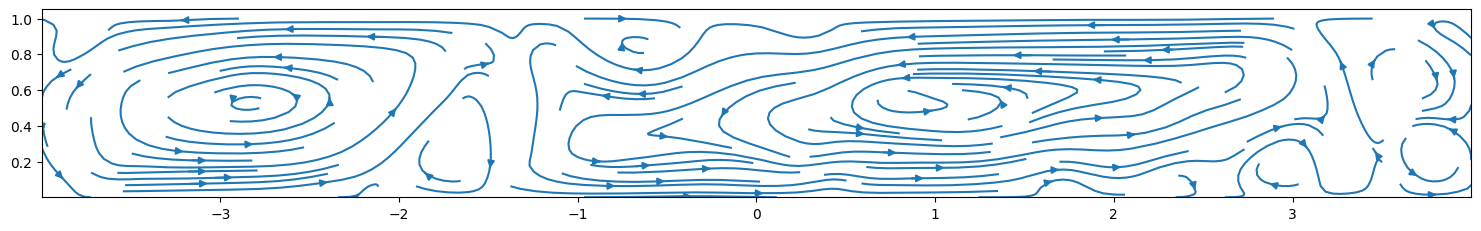

In [101]:
t = 581
fig, ax = plt.subplots(figsize = (15,10))
ax.streamplot(x.T, z.T, u[t,:,:].T , w[t,:,:].T)
# plt.colorbar(cf0)
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

In [83]:
print(x[:,0] == x[:,3])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [75]:
np.all(x == x[0,:], axis=0)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

ValueError: The rows of 'x' must be equal

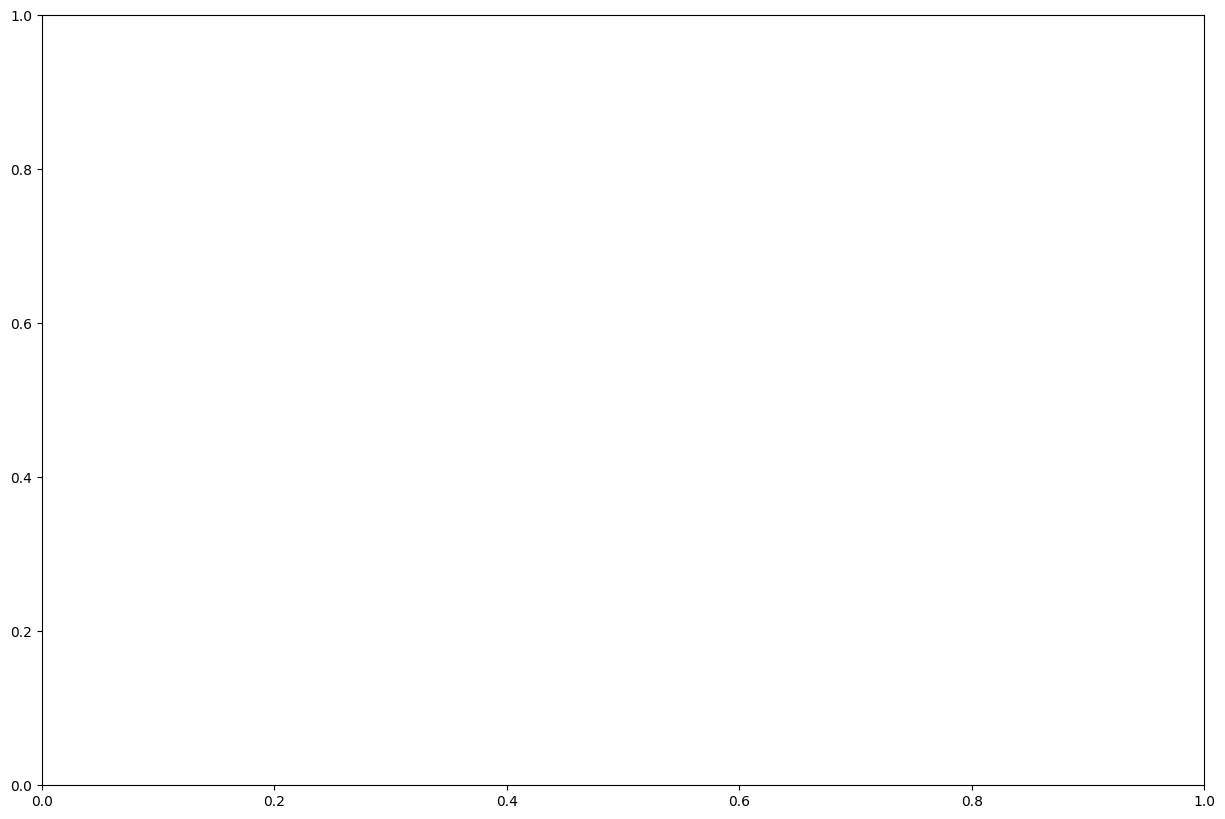

In [89]:
t = 581

fig, ax = plt.subplots(figsize=(15, 10))
ax.streamplot(, z, u[t,:,:], w[t,:,:])
ax.set_title(f'Streamlines at t = {t}')
plt.show()